In [1]:
from rawio.IO import *
import ROOT 
import root_numpy

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option("display.max_row", 100)
import numpy as np

import sys
import os, os.path 
import fnmatch
import glob

Welcome to JupyROOT 6.24/06


In [11]:
# Will want to get binning in getTraces() to eliminate this hardcoding
phononBins = np.arange(-409600.0, 2867200, 800) * 1e-3     # For UCB-C chip

# Will want to get channel names from G4SettingsInfo/Geometry.ChanName list
phononChans = ['Ch1']

In [3]:
# Generic function used by getTES() and getFET() below
# tree="g4dmcTES" or "g4dmcFET"; function will take care of directory
def getTraces(file, tree, chans, dtype=0):
    traces = { chan: list() for chan in chans }      # Separate empty lists for each key

    data = root_numpy.root2array(file, treename="G4SimDir/"+tree, 
                                 branches = ['EventNum','Trace','ChanName'],
                                 selection=f"DataType=={dtype}")
    
    # Copy traces for each event into new array indexed by event number
    for i in range(len(data)):
        for ch in traces.keys():
            if data['ChanName'][i] == bytes(ch, "ascii"):
                traces[ch].append(data['Trace'][i])
    
    for ch in traces.keys():
        traces[ch] = np.array(traces[ch])

    return traces

In [6]:
def getTES(file, dtype=0):
    tes = getTraces(file, "g4dmcTES", phononChans, dtype)

    # Convert TES traces from downward to upward going, remove baseline offset
    for ch in tes.keys():
        tes[ch] = np.array([max(tr)-tr for tr in tes[ch]])
        
    return tes

In [7]:
UCBC = 'data/HVeV_fits/UCB-C-1.95eV_51231212_000000.root'
event = 0
TES_UCBC = getTES(UCBC)

Text(0.5, 1.0, 'Trace for UCB-C Ch1 in Event 0')

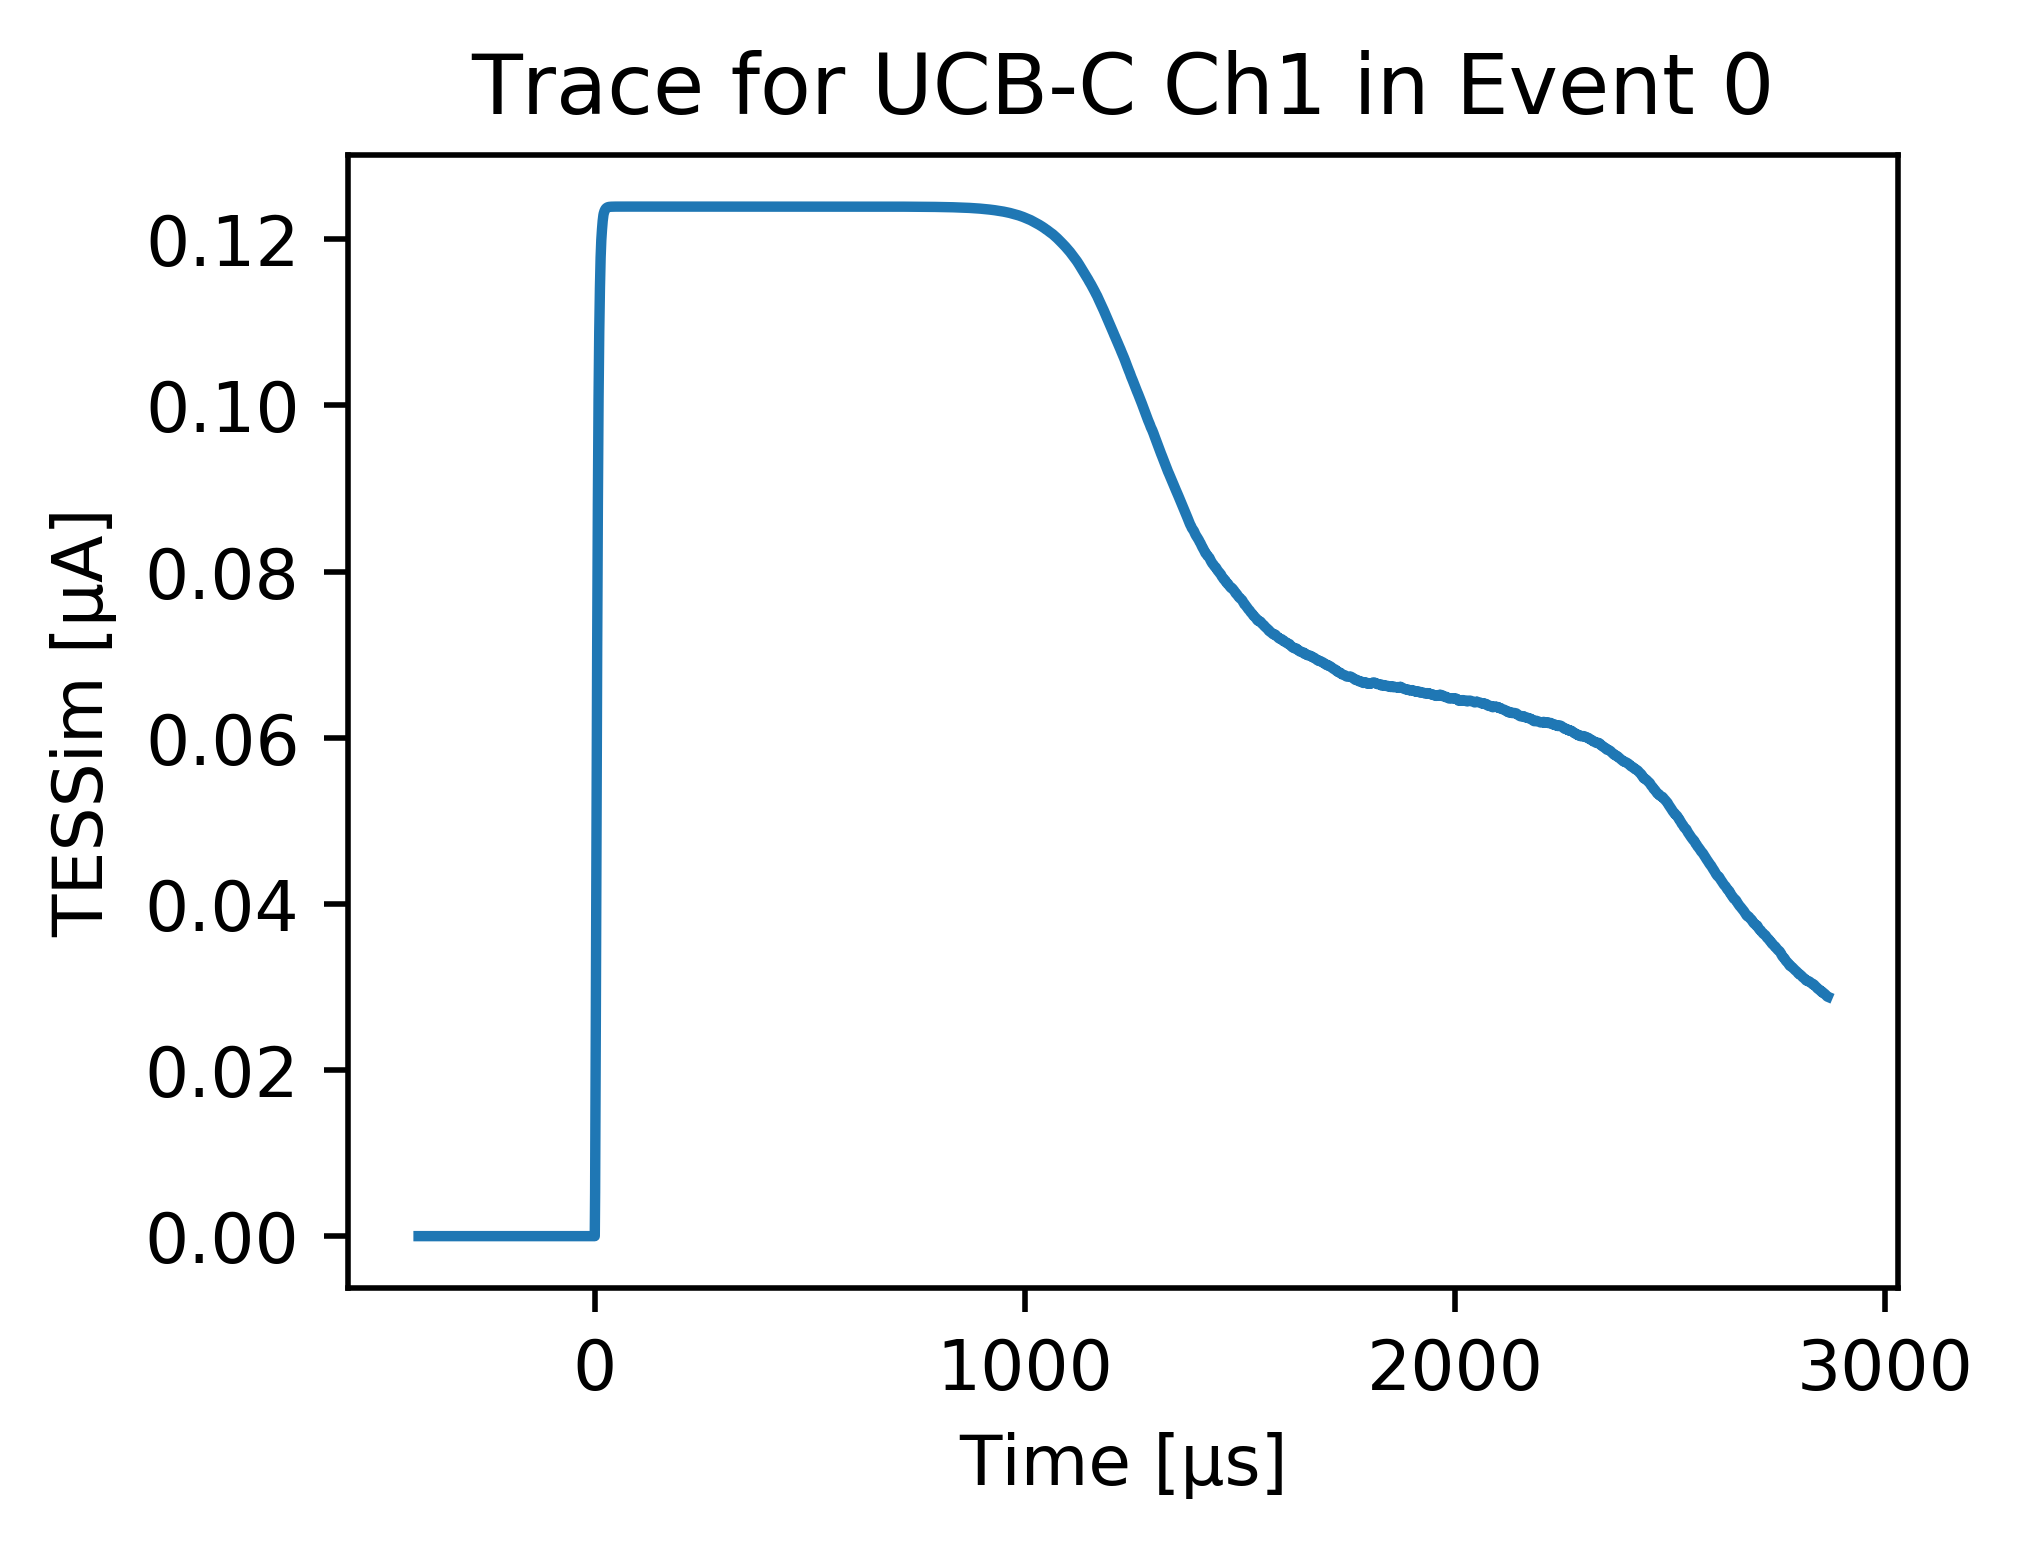

In [12]:
#### Only one channel to be plotted for UCB-C
fig1, axes = plt.subplots(1,1,figsize=(4,3), dpi=500)
axes.plot(phononBins, TES_UCBC[phononChans[0]][event])
axes.set_xlabel("Time [\u03BCs]")
axes.set_ylabel("TESSim [\u03BCA]")
axes.set_title(f"Trace for UCB-C {phononChans[0]} in Event {event}")

In [ ]:
fig1.savefig("UCBC_trace.eps")
fig1.savefig("UCBS_trace.png")